Caminho imagem: png_images/constelacao.png


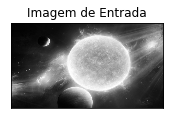

Comprimido (.pjpg) em: png_images/constelacao_grey.pjpg


In [39]:
import sys
import cv2
import matplotlib.pyplot as plot
import math
from PIL import Image

tqua = [[16, 11, 10, 16, 24,  40,  51,  61],
        [12, 12, 14, 19, 26,  58,  60,  55],
        [14, 13, 16, 24, 40,  57,  69,  56],
        [14, 17, 22, 29, 51,  87,  80,  62],
        [18, 22, 37, 56, 68,  109, 103, 77],
        [24, 35, 55, 64, 81,  104, 113, 92],
        [79, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]]

def exibicao (imagem, texto):
    plot.subplot(121)
    plot.imshow(imagem, cmap = 'gray')
    plot.title(str(texto)), plot.xticks([]), plot.yticks([])
    plot.show()
    
def criacao_matriz (imagem):
    mat_img = []
    for i in range(imagem.shape[0]):
        line = []
        for j in range(imagem.shape[1]):
            line.append(imagem[i,j,0])
        mat_img.append(line)
    return mat_img

def kdct (value):
    if (value == 0):
        return float(1/math.sqrt(2))
    else:
        return float(1)

def nucdct (m, u):
    inter  = math.pi*(2*m +1)*u
    inter /= 16
    return math.cos(inter)
    
def dct (matriz, hi, hf, wi, wf):
    mat_dct = matriz

    for u in range(hi, hf):
        for v in range(wi, wf):
            value = (kdct(u%8)*kdct(v%8))/4
            soma = 0

            for i in range(hi, hf):
                for j in range(wi, wf):
                    soma += matriz[i][j]*nucdct(i%8,u%8)*nucdct(j%8,v%8)

            value = value*soma
            value = int(value//tqua[u%8][v%8])
            matriz[u][v] = value

    return mat_dct

def codificacao (matriz):
    codigo = []

    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            exist = 0
            for k in range(len(codigo)):
                if (matriz[i][j] == codigo[k]):
                    exist = 1
                    break
            if (exist == 0):
                codigo.append(matriz[i][j])

    return codigo

def compressao_jpeg (imagem, caminho):
    height  = imagem.shape[0]
    width   = imagem.shape[1]
    matriz  = criacao_matriz (imagem)
    new_arq = caminho[:(len(caminho)-4)] + ".pjpg"

    for i in range(0, height, 8):
        x=i+8
        if (x>=height):
            x = height
        for j in range(0, width, 8):
            y=j+8
            if (y>=width):
                y=width
            mat_res = dct (matriz, i, x, j, y)

    codigo = codificacao (mat_res)
    saida = open(new_arq, 'wb')
    saida.write((height).to_bytes(4, byteorder='big'))
    saida.write((width).to_bytes(4, byteorder='big'))
    
    for i in range(height):
        for j in range(width):
            for k in range(len(codigo)):
                if (mat_res[i][j] == codigo[k]):
                    saida.write((k).to_bytes(1, byteorder='big'))
                    break
    
    for i in range(len(codigo)):
        if (codigo[i]>=0):
            saida.write(bytes("+", 'utf-8'))
            saida.write((codigo[i]).to_bytes(1, byteorder='big'))
        else:
            saida.write(bytes("-", 'utf-8'))
            saida.write((codigo[i]*(-1)).to_bytes(1, byteorder='big'))

    saida.close()
    return str(new_arq)
    
if __name__ == "__main__":
    caminho = str(input("Caminho imagem: "))
    caminho_grey = caminho[:(len(caminho)-4)] + "_grey" + caminho[(len(caminho)-4):]
    base = Image.open(caminho)
    base_grey = base.convert('L')
    base_grey.save(caminho_grey)
    
    imagem = cv2.imread(caminho_grey)
    exibicao (imagem, "Imagem de Entrada")
    new_arq = compressao_jpeg (imagem, caminho_grey)
    print ("Comprimido (.pjpg) em: "+new_arq)

Caminho imagem: png_images/constelacao_grey.pjpg


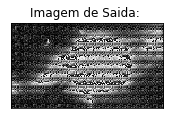

In [40]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plot
import math
from PIL import Image

tqua = [[16, 11, 10, 16, 24,  40,  51,  61],
        [12, 12, 14, 19, 26,  58,  60,  55],
        [14, 13, 16, 24, 40,  57,  69,  56],
        [14, 17, 22, 29, 51,  87,  80,  62],
        [18, 22, 37, 56, 68,  109, 103, 77],
        [24, 35, 55, 64, 81,  104, 113, 92],
        [79, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]]

def exibicao (imagem, texto, caminho):
    plot.subplot(121)
    plot.imshow(imagem, cmap = 'gray')
    cv2.imwrite(caminho[:(len(caminho)-5)]+"_pjpg.png", imagem)
    plot.title(str(texto)), plot.xticks([]), plot.yticks([])
    plot.show()

def quantizacao (matriz, hi, hf, wi, wf):
    mat_qua = matriz

    for i in range(hi, hf):
        for j in range(wi, wf):
            mat_qua[i][j] = matriz[i][j]*tqua[i%8][j%8]

    return mat_qua

def nucdct (m, u):
    inter  = math.pi*(2*m +1)*u
    inter /= 16
    return math.cos(inter)

def kdct (value):
    if (value == 0):
        return float(1/math.sqrt(2))
    else:
        return float(1)

def dct (matriz, hi, hf, wi, wf):
    mat_dct = []

    for u in range(hi, hf):
        line_dct = []
        for v in range(wi, wf):
            soma = 0

            for i in range(hi, hf):
                for j in range(wi, wf):
                    soma += ((kdct(i%8)*kdct(j%8))/4)*matriz[i][j]*nucdct(u%8,i%8)*nucdct(v%8,j%8)
            if (soma < 0):
                soma *= -1
            line_dct.append(int(soma))
        mat_dct.append(line_dct)
        
    return mat_dct

def descompressao_jpeg (caminho):
    arq = open(caminho,"rb")
    arq.seek(0,2)
    tamanho = arq.tell()
    arq.seek(0)

    height = int.from_bytes(arq.read(4), 'big')
    width  = int.from_bytes(arq.read(4), 'big')
    matriz = []
    
    for i in range(height):
        line = []
        for j in range(width):
            line.append(int.from_bytes(arq.read(1), 'big'))
        matriz.append(line)

    codigo = []
    while arq.tell() < tamanho:
        sig = (str(arq.read(1)))[2]
        valor = int.from_bytes(arq.read(1), 'big')
        if (sig == "-"):
            valor *= -1
        codigo.append(valor)
    
    for i in range(height):
        for j in range(width):
            matriz[i][j] = codigo[matriz[i][j]]
    
    mat_res = []
    for i in range(height):
        line_res = []
        for j in range(width):
            line_res.append(int(0))
        mat_res.append(line_res)

    for i in range(0, height, 8):
        x=i+8
        if (x>=height):
            x = height
        for j in range(0, width, 8):
            y=j+8
            if (y>=width):
                y=width
            mat = quantizacao (matriz, i, x, j, y)
            mat = dct (mat, i, x, j, y)
            
            for m in range(len(mat)):
                for n in range(len(mat[0])):
                    mat_res[i+m][j+n] = int(mat[m][n])
    
    imagem = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            imagem[i,j,0] = mat_res[i][j]
            imagem[i,j,1] = mat_res[i][j]
            imagem[i,j,2] = mat_res[i][j]

    return imagem

if __name__ == "__main__":
    caminho = str(input("Caminho imagem: "))
    imagem = descompressao_jpeg (caminho)
    exibicao (imagem, "Imagem de Saida: ", caminho)